In [1]:
#!pip install hvplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.svm import SVR
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

#Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Housing_USA= pd.read_csv('/content/drive/MyDrive/Dataset/USA_Housing.csv')

In [4]:
Housing_USA.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


#Eksplorasi Data

In [5]:
# find categorical variables

numerical = [var for var in Housing_USA.columns if Housing_USA[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [6]:
Housing_usa= Housing_USA.drop(['Address'], axis=1)

In [7]:
X = Housing_usa.drop(['Price'], axis=1)
y = Housing_usa['Price']

# Select the first 5000 samples
X = X.iloc[:5000, :]
y = y.iloc[:5000]

# If you prefer NumPy arrays, you can convert them
X = X.to_numpy()
y = y.to_numpy()



In [13]:
print(X.shape)


(5000, 5)


In [12]:
print(y.shape)
y = y.reshape(-1, 1)

(5000,)


In [10]:
y = y.ravel()

#Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [21]:
print(X)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462916 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [35]:
X_income=X[:1500,0]
y_price=y[:1500,0]

#Training Data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Tuning Parameter

In [16]:
from sklearn.svm import SVR
my_param_grid={'C': [0.01, 10, 55, 58, 59],
               'epsilon': [0.01, 0.1, 0.9, 1, 1.2],
               'kernel': ['linear','rbf']}
GridSearchCV(estimator=SVR(), param_grid= my_param_grid, refit= True, verbose= 3, cv=5)
grid_linear= GridSearchCV(estimator=SVR(), param_grid= my_param_grid, refit= True, verbose= 3, cv=3)

In [17]:
grid_linear.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.913 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.920 total time=   0.1s
[CV 3/3] END C=0.01, epsilon=0.01, kernel=linear;, score=0.922 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.733 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.691 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.725 total time=   0.2s
[CV 1/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.913 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.920 total time=   0.1s
[CV 3/3] END C=0.01, epsilon=0.1, kernel=linear;, score=0.923 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...C=0.01, epsilon=0.1, kernel=rbf;, score=0.728 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...C=0.01, epsilon=0.1, kernel=rbf;, score=0.690 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...C=0.01, epsilon=0.1, kernel=rbf;, score=0.720 total time=   0.2s
[CV 1/3] END C=0.01, epsilon=0.9, kernel=linear;, score=0.855 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=0.9, kernel=linear;, score=0.851 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=0.9, kernel=linear;, score=0.861 total time=   0.0s
[CV 1/3] END ...C=0.01, epsilon=0.9, kernel=rbf;, score=0.514 total time=   0.1s
[CV 2/3] END ...C=0.01, epsilon=0.9, kernel=rbf;, score=0.469 total time=   0.0s
[CV 3/3] END ...C=0.01, epsilon=0.9, kernel=rbf;, score=0.503 total time=   0.0s
[CV 1/3] END ..C=0.01, epsilon=1, kernel=linear;, score=0.831 total time=   0.0s
[CV 2/3] END ..C=0.01, epsilon=1, kernel=linear;, score=0.826 total time=   0.0s
[CV 3/3] END ..C=0.01, epsilon=1, kernel=linear;, score=0.837 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .....C=0.01, epsilon=1, kernel=rbf;, score=0.473 total time=   0.0s
[CV 2/3] END .....C=0.01, epsilon=1, kernel=rbf;, score=0.430 total time=   0.0s
[CV 3/3] END .....C=0.01, epsilon=1, kernel=rbf;, score=0.463 total time=   0.0s
[CV 1/3] END C=0.01, epsilon=1.2, kernel=linear;, score=0.774 total time=   0.0s
[CV 2/3] END C=0.01, epsilon=1.2, kernel=linear;, score=0.763 total time=   0.0s
[CV 3/3] END C=0.01, epsilon=1.2, kernel=linear;, score=0.771 total time=   0.0s
[CV 1/3] END ...C=0.01, epsilon=1.2, kernel=rbf;, score=0.396 total time=   0.0s
[CV 2/3] END ...C=0.01, epsilon=1.2, kernel=rbf;, score=0.356 total time=   0.0s
[CV 3/3] END ...C=0.01, epsilon=1.2, kernel=rbf;, score=0.376 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .C=10, epsilon=0.01, kernel=linear;, score=0.913 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=10, epsilon=0.01, kernel=linear;, score=0.920 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=10, epsilon=0.01, kernel=linear;, score=0.923 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=10, epsilon=0.01, kernel=rbf;, score=0.890 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=10, epsilon=0.01, kernel=rbf;, score=0.896 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=10, epsilon=0.01, kernel=rbf;, score=0.906 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..C=10, epsilon=0.1, kernel=linear;, score=0.913 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=10, epsilon=0.1, kernel=linear;, score=0.920 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=10, epsilon=0.1, kernel=linear;, score=0.923 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=10, epsilon=0.1, kernel=rbf;, score=0.896 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=10, epsilon=0.1, kernel=rbf;, score=0.901 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=10, epsilon=0.1, kernel=rbf;, score=0.909 total time=   0.5s
[CV 1/3] END ..C=10, epsilon=0.9, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/3] END ..C=10, epsilon=0.9, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/3] END ..C=10, epsilon=0.9, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/3] END .....C=10, epsilon=0.9, kernel=rbf;, score=0.864 total time=   0.0s
[CV 2/3] END .....C=10, epsilon=0.9, kernel=rbf;, score=0.852 total time=   0.0s
[CV 3/3] END .....C=10, epsilon=0.9, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/3] END ....C=10, epsilon=1, kernel=linear;, score=0.876 total time=   0.0s
[CV 2/3] END ....C=10, epsilon=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 3/3] END ....C=10, epsilon=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 1/3] END .......C=10, epsilon=1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 2/3] END .......C=10, epsilon=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/3] END .......C=10, ep

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .C=55, epsilon=0.01, kernel=linear;, score=0.913 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=55, epsilon=0.01, kernel=linear;, score=0.920 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=55, epsilon=0.01, kernel=linear;, score=0.923 total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=55, epsilon=0.01, kernel=rbf;, score=0.868 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=55, epsilon=0.01, kernel=rbf;, score=0.872 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=55, epsilon=0.01, kernel=rbf;, score=0.890 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..C=55, epsilon=0.1, kernel=linear;, score=0.913 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=55, epsilon=0.1, kernel=linear;, score=0.920 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=55, epsilon=0.1, kernel=linear;, score=0.923 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=55, epsilon=0.1, kernel=rbf;, score=0.877 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=55, epsilon=0.1, kernel=rbf;, score=0.881 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=55, epsilon=0.1, kernel=rbf;, score=0.892 total time=   1.6s
[CV 1/3] END ..C=55, epsilon=0.9, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/3] END ..C=55, epsilon=0.9, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/3] END ..C=55, epsilon=0.9, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/3] END .....C=55, epsilon=0.9, kernel=rbf;, score=0.864 total time=   0.0s
[CV 2/3] END .....C=55, epsilon=0.9, kernel=rbf;, score=0.852 total time=   0.0s
[CV 3/3] END .....C=55, epsilon=0.9, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/3] END ....C=55, epsilon=1, kernel=linear;, score=0.876 total time=   0.0s
[CV 2/3] END ....C=55, epsilon=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 3/3] END ....C=55, epsilon=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 1/3] END .......C=55, epsilon=1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 2/3] END .......C=55, epsilon=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/3] END .......C=55, ep

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .C=58, epsilon=0.01, kernel=linear;, score=0.913 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=58, epsilon=0.01, kernel=linear;, score=0.920 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=58, epsilon=0.01, kernel=linear;, score=0.923 total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=58, epsilon=0.01, kernel=rbf;, score=0.867 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=58, epsilon=0.01, kernel=rbf;, score=0.871 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=58, epsilon=0.01, kernel=rbf;, score=0.889 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..C=58, epsilon=0.1, kernel=linear;, score=0.913 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=58, epsilon=0.1, kernel=linear;, score=0.920 total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=58, epsilon=0.1, kernel=linear;, score=0.923 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=58, epsilon=0.1, kernel=rbf;, score=0.876 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=58, epsilon=0.1, kernel=rbf;, score=0.880 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=58, epsilon=0.1, kernel=rbf;, score=0.892 total time=   1.7s
[CV 1/3] END ..C=58, epsilon=0.9, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/3] END ..C=58, epsilon=0.9, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/3] END ..C=58, epsilon=0.9, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/3] END .....C=58, epsilon=0.9, kernel=rbf;, score=0.864 total time=   0.0s
[CV 2/3] END .....C=58, epsilon=0.9, kernel=rbf;, score=0.852 total time=   0.0s
[CV 3/3] END .....C=58, epsilon=0.9, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/3] END ....C=58, epsilon=1, kernel=linear;, score=0.876 total time=   0.0s
[CV 2/3] END ....C=58, epsilon=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 3/3] END ....C=58, epsilon=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 1/3] END .......C=58, epsilon=1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 2/3] END .......C=58, epsilon=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/3] END .......C=58, ep

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/3] END .C=59, epsilon=0.01, kernel=linear;, score=0.913 total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .C=59, epsilon=0.01, kernel=linear;, score=0.920 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .C=59, epsilon=0.01, kernel=linear;, score=0.923 total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ....C=59, epsilon=0.01, kernel=rbf;, score=0.867 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ....C=59, epsilon=0.01, kernel=rbf;, score=0.870 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ....C=59, epsilon=0.01, kernel=rbf;, score=0.889 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..C=59, epsilon=0.1, kernel=linear;, score=0.913 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..C=59, epsilon=0.1, kernel=linear;, score=0.920 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..C=59, epsilon=0.1, kernel=linear;, score=0.923 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .....C=59, epsilon=0.1, kernel=rbf;, score=0.876 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .....C=59, epsilon=0.1, kernel=rbf;, score=0.879 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .....C=59, epsilon=0.1, kernel=rbf;, score=0.892 total time=   1.7s
[CV 1/3] END ..C=59, epsilon=0.9, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/3] END ..C=59, epsilon=0.9, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/3] END ..C=59, epsilon=0.9, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/3] END .....C=59, epsilon=0.9, kernel=rbf;, score=0.864 total time=   0.0s
[CV 2/3] END .....C=59, epsilon=0.9, kernel=rbf;, score=0.852 total time=   0.0s
[CV 3/3] END .....C=59, epsilon=0.9, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/3] END ....C=59, epsilon=1, kernel=linear;, score=0.876 total time=   0.0s
[CV 2/3] END ....C=59, epsilon=1, kernel=linear;, score=0.880 total time=   0.0s
[CV 3/3] END ....C=59, epsilon=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 1/3] END .......C=59, epsilon=1, kernel=rbf;, score=0.855 total time=   0.0s
[CV 2/3] END .......C=59, epsilon=1, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/3] END .......C=59, ep

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 10, 55, 58, 59],
                         'epsilon': [0.01, 0.1, 0.9, 1, 1.2],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
grid_linear.best_estimator_

SVR(C=10, kernel='linear')

In [26]:
ypred_linear_optimized=grid_linear.predict(X_test)

#Visualisasi Output

In [36]:
print(X_income.shape)
print(y_price.shape)


(1500,)
(1500,)


In [29]:
y.shape

(5000, 1)

In [30]:
ypred_linear_optimized.shape

(1500,)

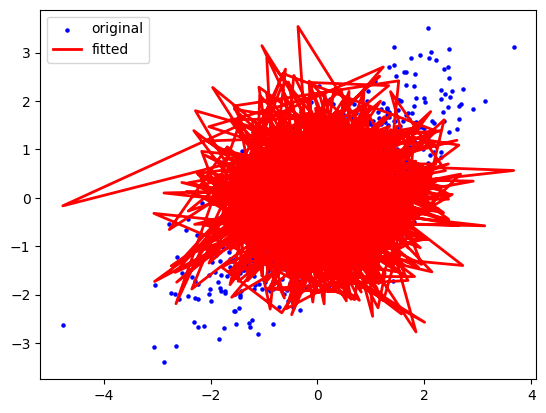

In [38]:
plt.scatter(X_income, y_price, s=5, color="blue", label="original")
plt.plot(X_income, ypred_linear_optimized, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

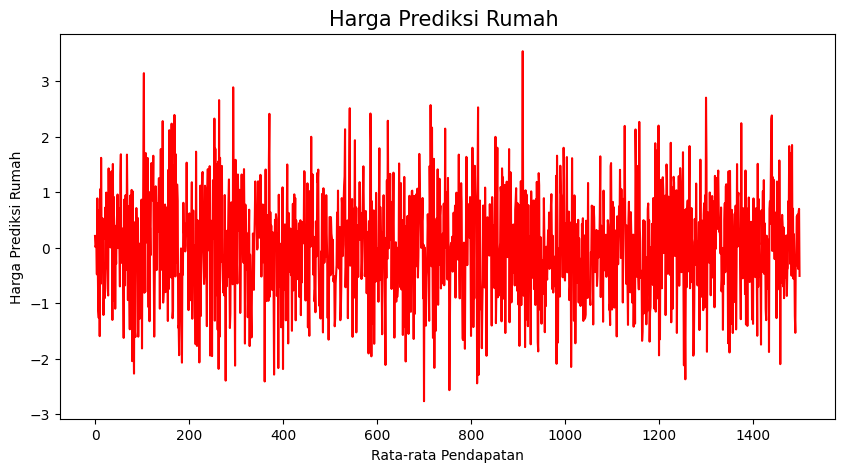

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(ypred_linear_optimized, label='Harga Prediksi Rumah', color='red')
plt.xlabel('Rata-rata Pendapatan', fontsize=10)
plt.ylabel('Harga Prediksi Rumah', fontsize=10)
plt.title('Harga Prediksi Rumah ', fontsize=15)
plt.show()

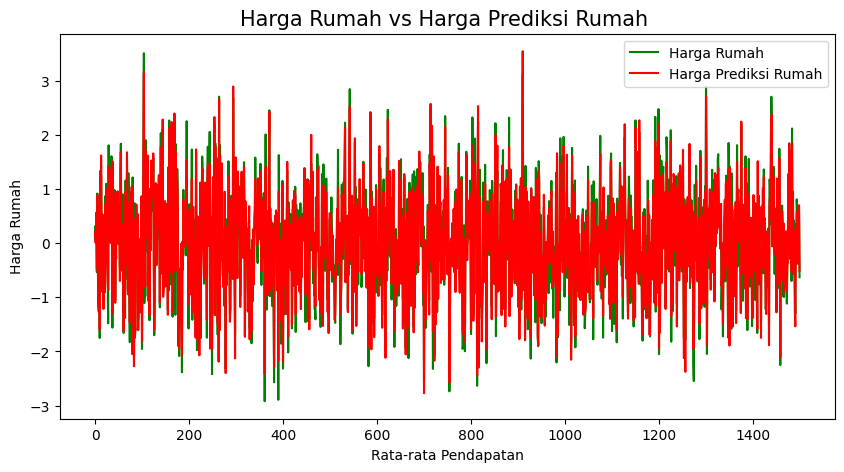

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test, label='Harga Rumah', color='green')
plt.plot(ypred_linear_optimized, label='Harga Prediksi Rumah', color='red')
plt.xlabel('Rata-rata Pendapatan', fontsize=10)
plt.ylabel('Harga Rumah', fontsize=10)
plt.title('Harga Rumah vs Harga Prediksi Rumah ', fontsize=15)
plt.legend()
plt.show()

#Evaluasi Model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR  # Import SVR if not already imported
import numpy as np

NMSE = cross_val_score(SVR(kernel='linear', C=10), X_train, y_train, cv=5, scoring="neg_mean_squared_error")
MSE = round(np.mean(-NMSE), 4)
RMSE = round(np.sqrt(MSE), 4)

print('Nilai dari RMSE model SVR adalah:', RMSE)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Nilai dari RMSE model SVR adalah: 0.2879


In [ ]:
model_poly=SVR(kernel='linear', C=10)
score_poly= cross_val_score(model_poly, X_train, y_train)
score_poly.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.9187572446292098